[View in Colaboratory](https://colab.research.google.com/github/KazuyukiIgarashi/Report/blob/master/18M10070_report2.ipynb)

# Machine Learning: Intermediate report
18M10070

Prepare an environment for running Python codes on Jupyter notebook. The most easiest way is to use [Google Colaboratory](https://colab.research.google.com/).

Write codes for the following three (and one optional) problems, and submit the notebook (`.ipynb`) as well as its HTML conversion (`.html`). *We do not accept a report in other formats (e.g., Word, PDF)*. Write a code at the specified cell in the notebook. One can add more cells if necessary.

These are the links to the sample codes used in the lecture:

+ [Binary classification](https://github.com/chokkan/deeplearningclass/blob/master/mlp_binary.ipynb)
+ [MNIST](https://github.com/chokkan/deeplearningclass/blob/master/mnist.ipynb)

## 1. Multi-class classification on MNIST

Train a model on the training set of MNIST, and report the accuracy of the model on the test set. One can use the same code shown in the lecture. Write a code here and show the output.

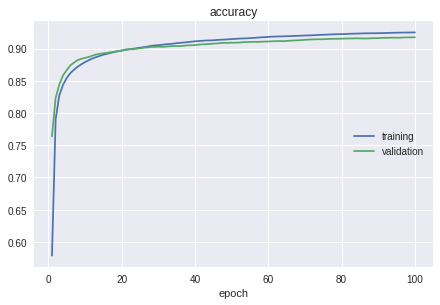

Accuracy: 0.9175 (test), 0.9250 (train)


In [8]:
import numpy as np
from livelossplot import PlotLosses

def softmax(x):
    # Result of softmax are invariant even if we add/subtract a constant.
    ex = np.exp(x - np.max(x))  # Subtract such that the maximum value is one.
    return ex / ex.sum(axis=0)

def image_to_vector(X):
    X = np.reshape(X, (len(X), -1))     # Flatten: (N x 28 x 28) -> (N x 784)
    return np.c_[X, np.ones(len(X))]    # Append 1: (N x 784) -> (N x 785)

def label_to_onehot(Y, K):
    return np.eye(K)[Y]              # e.g., 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0]
    
data = np.load('mnist.npz')
Xtrain = image_to_vector(data['train_x'])
Ytrain = label_to_onehot(data['train_y'], 10)
Xtest = image_to_vector(data['test_x'])
Ytest = data['test_y']

W = np.random.randn(10, 28*28+1)

eta = 0.001
liveloss = PlotLosses()
for t in range(100):
    num_correct_train = 0
    
    # Stochastic gradient descent.
    for x, y in zip(Xtrain, Ytrain):
        y_pred = softmax(np.dot(W, x))
        W += np.outer(eta * (y - y_pred), x)
        if  np.argmax(y_pred) == np.argmax(y):
            num_correct_train += 1
    
    # Evaluate and store the accuracy on the test set.
    num_correct_test = 0
    for x, y in zip(Xtest, Ytest):
        y_pred = np.argmax(np.dot(W, x))
        if y_pred == y:
            num_correct_test += 1
            
    # Visualize accuracy values on the training and test sets.
    liveloss.update({
        'accuracy': float(num_correct_train) / len(Ytrain),
        'val_accuracy': float(num_correct_test) / len(Ytest)
    })
    liveloss.draw()
    
print('Accuracy: {:.4f} (test), {:.4f} (train)'.format(
    float(num_correct_test) / len(Ytest), 
    float(num_correct_train) / len(Ytrain)
    ))

## 2. Confusion matrix

Show a confusion matrix of the predictions of the model on the test set. This is an example of a confusion matrix.

![example](https://github.com/chokkan/deeplearningclass/blob/master/assignment/example-confusion-matrix.png?raw=1)

Write a code here and show the confusion matrix.

In [16]:
import numpy as np
from livelossplot import PlotLosses
import pprint

def softmax(x):
    # Result of softmax are invariant even if we add/subtract a constant.
    ex = np.exp(x - np.max(x))  # Subtract such that the maximum value is one.
    return ex / ex.sum(axis=0)

def image_to_vector(X):
    X = np.reshape(X, (len(X), -1))     # Flatten: (N x 28 x 28) -> (N x 784)
    return np.c_[X, np.ones(len(X))]    # Append 1: (N x 784) -> (N x 785)

def label_to_onehot(Y, K):
    return np.eye(K)[Y]              # e.g., 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0]
    
data = np.load('mnist.npz')
Xtrain = image_to_vector(data['train_x'])
Ytrain = label_to_onehot(data['train_y'], 10)
Xtest = image_to_vector(data['test_x'])
Ytest = data['test_y']


W = np.random.randn(10, 28*28+1)

eta = 0.001
liveloss = PlotLosses()
for t in range(100):
    num_correct_train = 0
    array = [[0]*10 for i in range(10)]  
    # Stochastic gradient descent.
    for x, y in zip(Xtrain, Ytrain):
        y_pred = softmax(np.dot(W, x))
        W += np.outer(eta * (y - y_pred), x)
        if  np.argmax(y_pred) == np.argmax(y):
            num_correct_train += 1
    
    # confusion matrix on the test set.
    num_correct_test = 0
    for x, y in zip(Xtest, Ytest):
        y_pred = np.argmax(np.dot(W, x))
        array[y_pred][y] += 1

pprint.pprint(array)

[[949, 0, 9, 4, 1, 10, 8, 1, 7, 7],
 [0, 1110, 15, 0, 1, 1, 3, 6, 9, 7],
 [4, 4, 907, 21, 8, 3, 10, 21, 10, 1],
 [2, 2, 20, 917, 2, 28, 1, 6, 29, 12],
 [0, 0, 9, 2, 901, 7, 9, 9, 9, 17],
 [11, 4, 7, 22, 1, 793, 23, 0, 41, 9],
 [8, 4, 12, 1, 8, 12, 898, 0, 13, 1],
 [3, 1, 13, 11, 5, 5, 2, 937, 7, 17],
 [2, 9, 33, 19, 9, 26, 3, 4, 835, 8],
 [1, 1, 7, 13, 46, 7, 1, 44, 14, 930]]


## 3. Top-3 confusing examples

Show the top three images where the model misrecognized their digits with strong confidences. More specifically, let $y_n$ and $\hat{y}_n$ the true and predicted, respectively, digits of the image $x_n$. We want to find three images with high $P(\hat{y}_n | x_n)$ when $y_n \neq \hat{y}_n$.

Please show $y_n$, $P(y_n | x_n)$, $\hat{y}_n$, and $P(\hat{y}_n | x_n)$. This is an example of an output for an image (you need this kind of outputs for top-three images).

![example](https://github.com/chokkan/deeplearningclass/blob/master/assignment/example-confusing-sample.png?raw=1)

Write a code here and show the output.

True digit:2 (8.992270158158421e-08); prediction:4 (0.999985643236937)
2


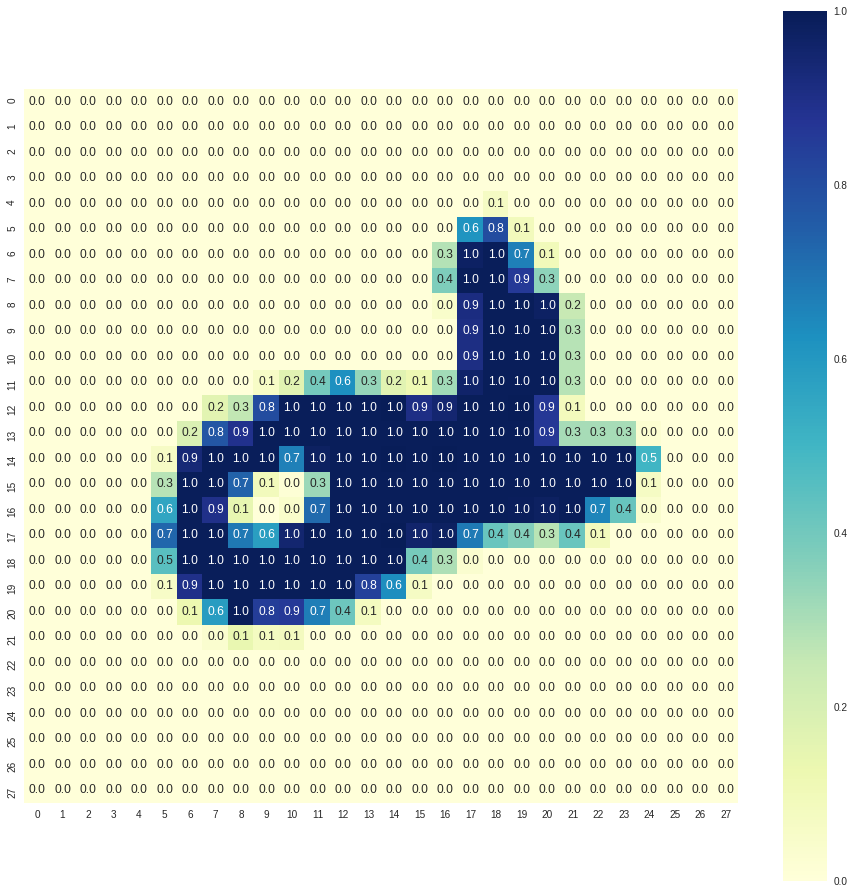

True digit:2 (1.4089885461471761e-06); prediction:7 (0.9999427513871517)
2


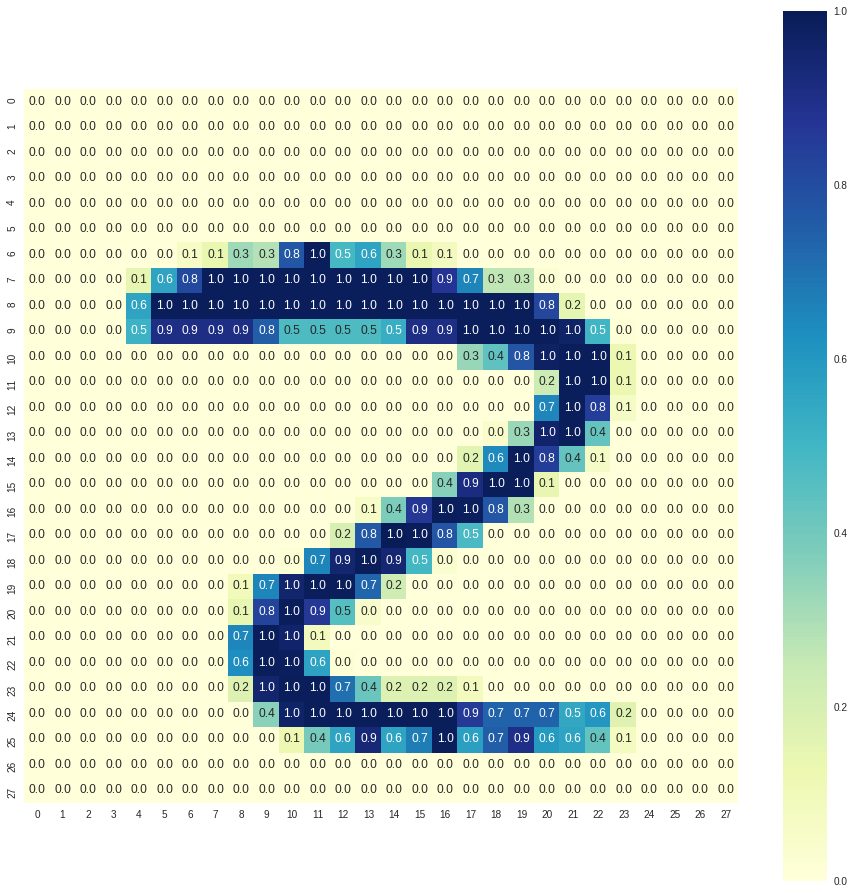

True digit:8 (9.527966841176155e-05); prediction:6 (0.9998350848104858)
8


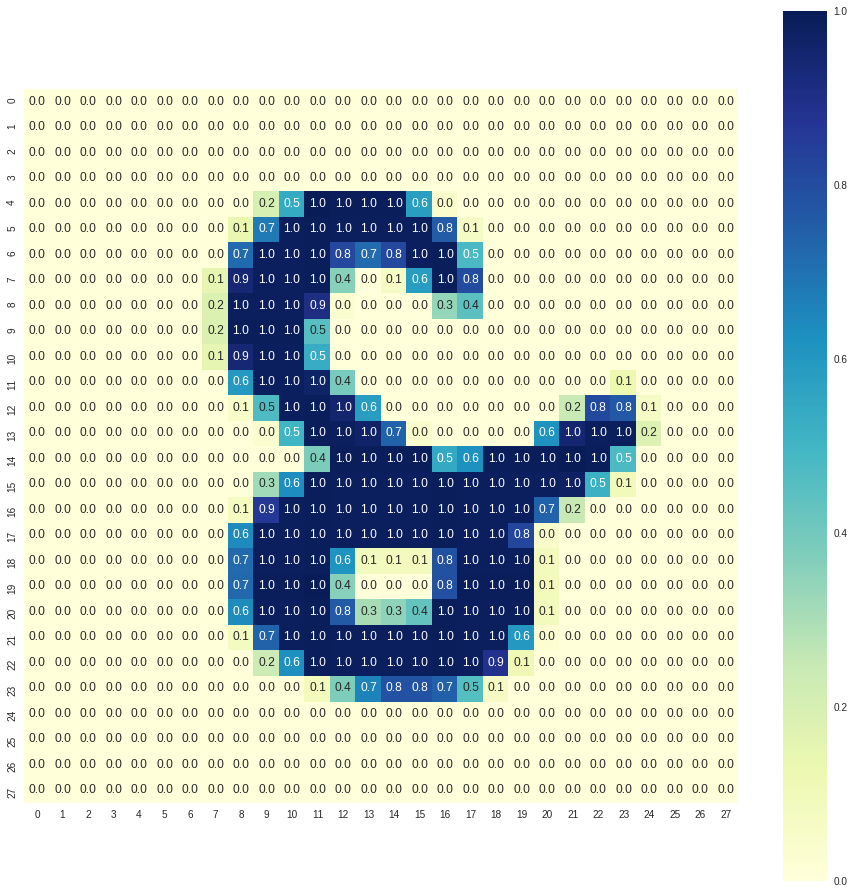

In [25]:
import numpy as np
from livelossplot import PlotLosses
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    # Result of softmax are invariant even if we add/subtract a constant.
    ex = np.exp(x - np.max(x))  # Subtract such that the maximum value is one.
    return ex / ex.sum(axis=0)

def image_to_vector(X):
    X = np.reshape(X, (len(X), -1))     # Flatten: (N x 28 x 28) -> (N x 784)
    return np.c_[X, np.ones(len(X))]    # Append 1: (N x 784) -> (N x 785)

def label_to_onehot(Y, K):
    return np.eye(K)[Y]              # e.g., 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0]
    
data = np.load('mnist.npz')
Xtrain = image_to_vector(data['train_x'])
Ytrain = label_to_onehot(data['train_y'], 10)
Xtest = image_to_vector(data['test_x'])
Ytest = label_to_onehot(data['test_y'], 10)
Ymax = [0, 0, 0]
Yhatmax = [0, 0, 0]
PYmax = [0.0, 0.0, 0.0]
PYhatmax = [0.0, 0.0, 0.0]
Nummax = [0, 0, 0]
testNum = 0

W = np.random.randn(10, 28*28+1)

eta = 0.001
liveloss = PlotLosses()
for t in range(100):
    # Stochastic gradient descent.
    for x, y in zip(Xtrain, Ytrain):
        y_pred = softmax(np.dot(W, x))
        W += np.outer(eta * (y - y_pred), x)

# Evaluate and store the accuracy on the test set.
for x, y in zip(Xtest, Ytest):
    y_pred = softmax(np.dot(W, x))
    if np.argmax(y_pred) != np.argmax(y):
        if max(y_pred) >= PYhatmax[0]:
          PYmax = np.roll(PYmax,1)
          PYhatmax = np.roll(PYhatmax,1)
          Ymax = np.roll(Ymax,1)
          Yhatmax = np.roll(Yhatmax,1)
          Nummax = np.roll(Nummax,1)
          PYmax[0] = y_pred[np.argmax(y)]
          PYhatmax[0] = max(y_pred)
          Yhatmax[0] = np.argmax(y_pred)
          Ymax[0] = np.argmax(y)
          Nummax[0] = testNum
        elif max(y_pred) >= PYhatmax[1]:
          PYmax[2] = PYmax[1]
          PYhatmax[2] = PYhatmax[1]
          Ymax[2] = Ymax[1]
          Yhatmax[2] = Yhatmax[1]
          Nummax[2] = Nummax[1]
          PYmax[1] = y_pred[np.argmax(y)]
          PYhatmax[1] = max(y_pred)
          Yhatmax[1] = np.argmax(y_pred)
          Ymax[1] = np.argmax(y)   
          Nummax[1] = testNum
        elif max(y_pred) >= PYhatmax[2]:
          PYmax[2] = y_pred[np.argmax(y)]
          PYhatmax[2] = max(y_pred)
          Yhatmax[2] = np.argmax(y_pred)
          Ymax[2] = np.argmax(y)             
          Nummax[2] = testNum
    testNum += 1 

# Index number of an instance (change this to view another instance).
for i in range(3):

  data = np.load('mnist.npz')
  image = data['test_x'][Nummax[i]]
  label = data['test_y'][Nummax[i]]
  
  print("True digit:{0} ({1}); prediction:{2} ({3})".format(Ymax[i],PYmax[i],Yhatmax[i],PYhatmax[i]))
  print(label)
  f, ax = plt.subplots(figsize=(16, 16))
  sns.heatmap(image, annot=True, fmt='.1f', square=True, cmap="YlGnBu")
  plt.show()

## 4. Sample codes in other DL frameworks

(Advanced; optional) Implement one or more sample code(s) with a different deep learning framework (e.g., Chainer, TensorFlow, DyNet) corresponding to the slides 60-66 in binary classification. *When subitting an answer to this problem, please agree that some of the submitted codes will be distributed on the Web site to improve this lecture.*